In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import *
from statannotations.Annotator import Annotator

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

## 연습문제 1

In [3]:
df1 = pd.read_excel("https://data.hossam.kr/mldata/bread.xlsx")
df1.head()

,무게
0,482
1,479
2,485
3,474
4,479


- 단일 표본이므로 단일표본 T검정을 실행
  - $\mu$	값은 500

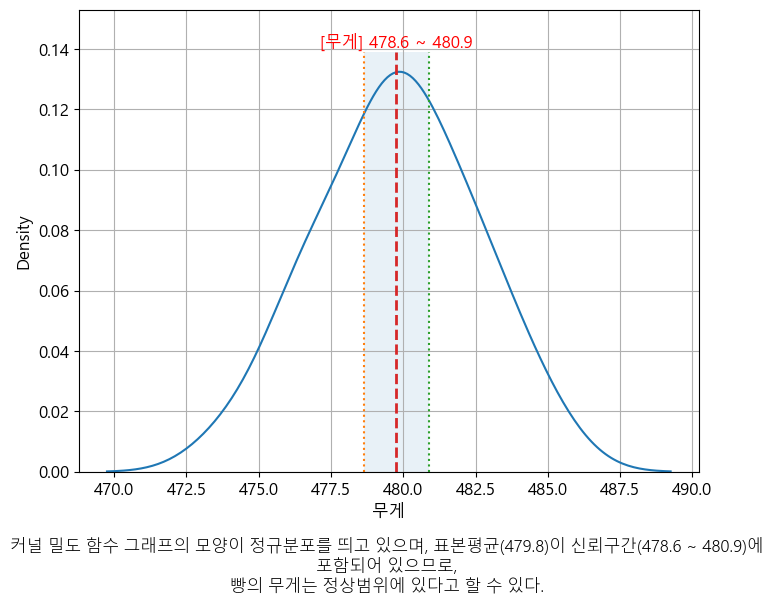

In [4]:
plt.figure()

data = df1['무게']                           # 데이터만 추출
max = data.max()                                # 최대값
clevel = 0.95                                   # 신뢰수준
dof = len(data) - 1                             # 자유도
sample_mean = data.mean()                       # 표본평균
sample_std = data.std(ddof=1)                   # 표본표준편차
sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

sb.kdeplot(data=data)

xmin, xmax, ymin, ymax = plt.axis()

# 신뢰구간 그리기
plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

# 평균 그리기
plt.plot([sample_mean, sample_mean], [ymin, ymax], linestyle='--', linewidth=2)

plt.text(x=(cmax-cmin)/2+cmin,
         y=ymax,
         s="[%s] %0.1f ~ %0.1f" % (data.name, cmin, cmax),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontdict={"size": 12, "color": "red"})

plt.ylim(ymin, ymax*1.1)

txt = """커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 표본평균({:.1f})이 신뢰구간({:.1f} ~ {:.1f})에 포함되어 있으므로,
빵의 무게는 정상범위에 있다고 할 수 있다.""".format(sample_mean, cmin, cmax)

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()
plt.close()

- 정규성 검정

In [5]:
normaltest(df1['무게'])

NormaltestResult(statistic=0.08329530148440442, pvalue=0.9592076971568269)

- 정규성 검정 결과 p-value는 0.05보다 크기 때문에 정규성을 만족한다고 판단한다

- 빵의 무게가 500g보다 되지 않는지 여부를 확인하기 위해서 단일표본 검정에서 단측검정을 실행한다 (alternative = 'less')

In [6]:
ttest_1samp(df1['무게'], 500, alternative = 'less')

TtestResult(statistic=-37.52440086057345, pvalue=3.986508445195305e-23, df=24)

- 귀무가설 : 빵의 평균무게는 500g보다 작지 않다.
- 대립가설 : 빵의 평균무게는 500g보다 작다.

- 검정 결과 p-value는 0.05보다 매우 낮은 값으로 평균무게는 500g보다 작다고 할 수 있으므로 빵집에 컴플레인을 걸만한 근거가 충분하다

## 연습문제 2

In [7]:
df2 = pd.read_excel("https://data.hossam.kr/mldata/material.xlsx")
df2.head()

,상표1,상표2
0,80.4,81.8
1,78.2,82.7
2,80.1,80.7
3,77.1,84.0
4,79.6,79.0


- 두 그룹은 다른 상표의 제품이기 때문에 독립표본 T검정을 실행한다

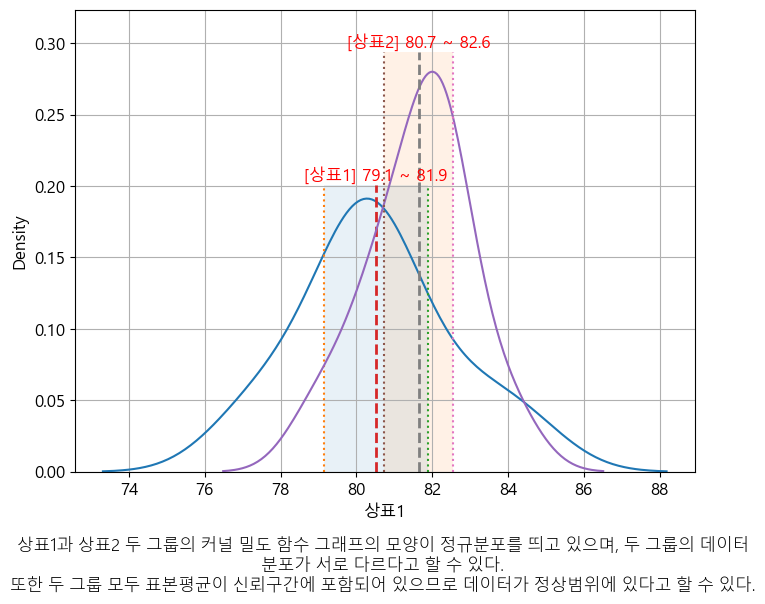

In [8]:
plt.figure()

for c in df2.columns:
    #print(c)
    
    data = df2[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

plt.ylim(0, ymax*1.1)

txt = """상표1과 상표2 두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()
plt.close()

- 정규성 검정

In [9]:
for c in df2.columns:
    s, p = normaltest(df2[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))

[상표1] statistic: 0.638, p-value: 0.727, 정규성 충족 여부: True
[상표2] statistic: 0.775, p-value: 0.679, 정규성 충족 여부: True


- 두 그룹은 정규성을 만족한다

In [10]:
normal_dist = True      # 정규성 만족 여부
data = df2.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p >= 0.05))

Bartlett 검정: statistic: 1.555, p-value: 0.212, 등분산성 충족 여부: True


- 두 그룹은 등분산성을 만족한다

- 두 그룹의 성분 A의 함량이 다른지를 검정하기 위해서는 독립표본 T검정의 양측 검정을 실행한다(alternative = 'two-sided')
  - 귀무가설 : 상표1과 상표2의 성분A의 함량은 다르지 않다.
  - 대립가설 : 상표1과 상표2의 성분A의 함량은 다르다.

In [11]:
ttest_ind(df2['상표1'], df2['상표2'], alternative = 'two-sided')

Ttest_indResult(statistic=-1.528327244013234, pvalue=0.14209335286373134)

- 검정 결과 p-value는 0.05 이상으로 귀무가설을 기각할 수 없기 때문에 상표 1과 상표 2의 성분 A의 함량은 차이가 없다고 할 수 있다.

In [12]:
df2_2 = pd.melt(df2, var_name = 'group', value_name = 'value')
df2_2.head()

,group,value
0,상표1,80.4
1,상표1,78.2
2,상표1,80.1
3,상표1,77.1
4,상표1,79.6


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

상표1 vs. 상표2: t-test independent samples, P_val:1.421e-01 t=-1.528e+00


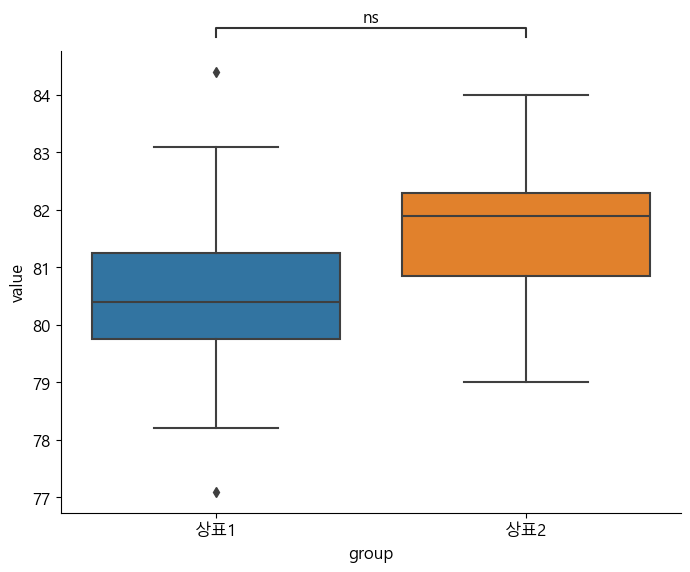

In [13]:
plt.figure()
ax = sb.boxplot(data=df2_2, x='group', y='value')

annotator = Annotator(ax, data=df2_2, x='group', y='value', pairs=[('상표1', '상표2')])
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

## 연습문제 3

In [14]:
df3 = pd.read_excel("https://data.hossam.kr/mldata/blood_pressure.xlsx")
df3.head()

,복용전,복용후
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58


- 단일 표본에 대한 복용 전과 복용 후의 혈압을 비교한 것이므로 대응표본 T검정을 실행한다.

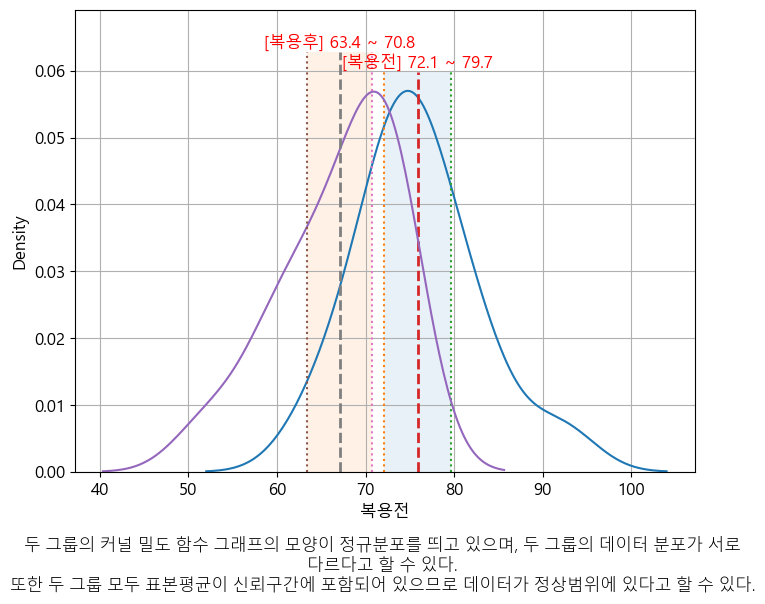

In [15]:
plt.figure()

for c in df3.columns:
    #print(c)

    data = df3[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [16]:
for c in df3.columns:
    s, p = normaltest(df3[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))

[복용전] statistic: 2.591, p-value: 0.274, 정규성 충족 여부: True
[복용후] statistic: 2.656, p-value: 0.265, 정규성 충족 여부: True


- 정규성 검정 결과 두 그룹은 정규성을 만족한다.

In [17]:
normal_dist = True      # 정규성 만족 여부
data = df3.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 0.011, p-value: 0.916, 등분산성 충족 여부: True


- 등분산성 검정 결과 두 그룹은 등분산성을 만족한다.

- 피임약 복용시 혈압 변화를 확인하기 위해 복용 전과 복용 후 데이터에 대하여 대응표본 T검정을 실행한다
  - 귀무가설 : 복용 전 혈압은 복용 후 혈압과 다르지 않다 or 작지 않다 or 크지 않다.
  - 대립가설 : 복용 전 혈압은 복용 후 혈압과(보다) 다르다 or 작다 or 크다.

In [18]:
ttest_rel(df3['복용후'], df3['복용전'], alternative = 'two-sided')

TtestResult(statistic=-3.105360487466109, pvalue=0.007749436106654119, df=14)

In [19]:
ttest_rel(df3['복용후'], df3['복용전'], alternative = 'greater')

TtestResult(statistic=-3.105360487466109, pvalue=0.9961252819466729, df=14)

In [20]:
ttest_rel(df3['복용후'], df3['복용전'], alternative = 'less')

TtestResult(statistic=-3.105360487466109, pvalue=0.0038747180533270594, df=14)

- 검정 결과 양측 검정과 less 단측 검정에서 대립가설이 채택되었다. 피임약 복용시 혈압이 떨어지는 것으로 추정된다.

In [21]:
df3_2 = pd.melt(df3, var_name = 'group', value_name = 'value')
df3_2.head()

,group,value
0,복용전,70
1,복용전,80
2,복용전,72
3,복용전,76
4,복용전,76


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

복용전 vs. 복용후: t-test paired samples, P_val:7.749e-03 t=3.105e+00


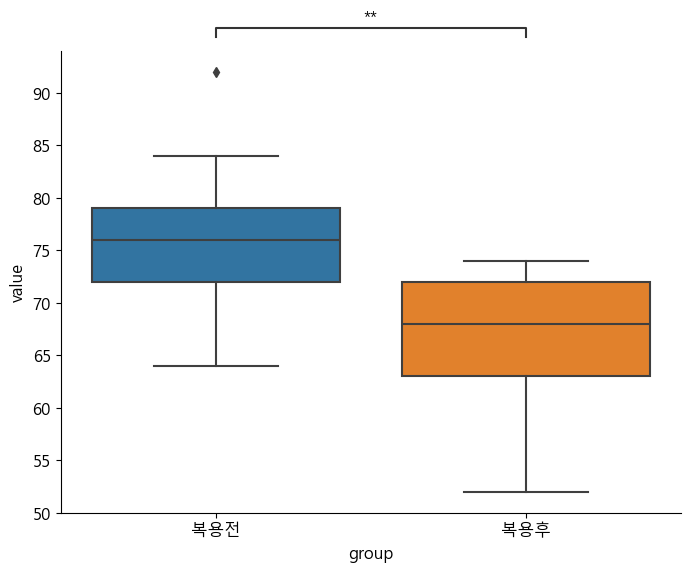

In [22]:
plt.figure()
ax = sb.boxplot(data=df3_2, x='group', y='value')

annotator = Annotator(ax, data=df3_2, x='group', y='value', pairs=[('복용전', '복용후')])
annotator.configure(test='t-test_paired', text_format='star', loc='outside')
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

## 연습문제 4

In [23]:
df4 = pd.read_excel("https://data.hossam.kr/mldata/runner_diet.xlsx")
df4.head()

,감량전,감량후
0,14.5,14.3
1,13.4,13.4
2,13.0,13.1
3,14.5,13.9
4,13.3,13.1


- 단일 표본에 대한 체중 감량이 미치는 영향을 확인하고자 하기 때문에 대응표본 T검정을 실행한다

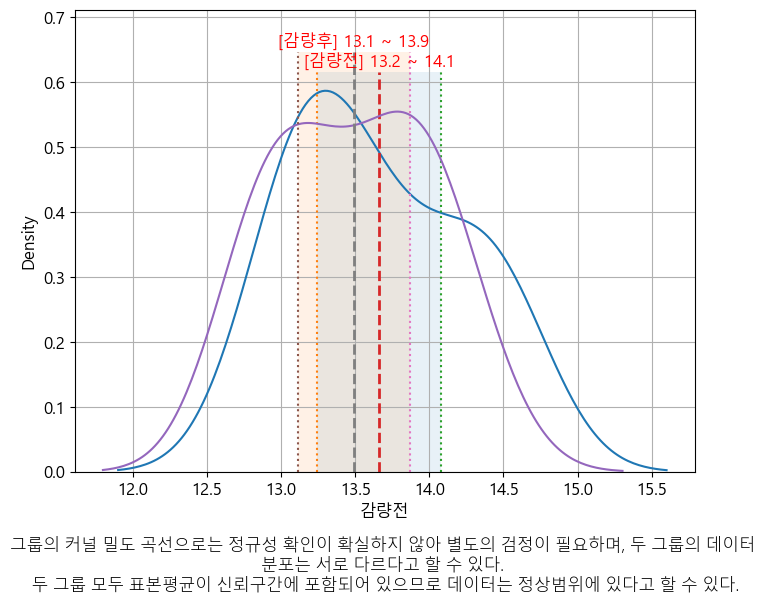

In [24]:
plt.figure()

for c in df4.columns:
    #print(c)

    data = df4[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

txt = """그룹의 커널 밀도 곡선으로는 정규성 확인이 확실하지 않아 별도의 검정이 필요하며, 두 그룹의 데이터 분포는 서로 다르다고 할 수 있다.
 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터는 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

- 정규성 검정

In [25]:
for c in df4.columns:
    s, p = normaltest(df4[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))

[감량전] statistic: 2.063, p-value: 0.356, 정규성 충족 여부: True
[감량후] statistic: 1.647, p-value: 0.439, 정규성 충족 여부: True


- 정규성 검정 결과 두 그룹은 정규성을 만족한다

In [26]:
normal_dist = True      # 정규성 만족 여부
data = df4.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p >= 0.05))

Bartlett 검정: statistic: 0.073, p-value: 0.787, 등분산성 충족 여부: True


- 등분산성 검정 결과 두 그룹은 등분산성을 만족한다

- 속도의 차이가 있는지 여부만 검정하므로 양측 검정을 실행한다 (alternative = 'two-sided')
  - 귀무가설 : 체중 감량 전과 체중 감량 후의 달리기 결과는 다르지 않다.
  - 대립가설 : 체중 감량 전과 체중 감량 후의 달리기 결과는 다르다.

In [27]:
ttest_rel(df4['감량후'], df4['감량전'], alternative = 'two-sided')

TtestResult(statistic=-2.375306807446375, pvalue=0.04154604923393679, df=9)

- p-value가 0.05 이하이므로 귀무가설을 기각하고 대립가설을 채택한다. 따라서 체중 감량 전과 체중 감량 후의 평균 달리기 속도는 차이가 있어서 체중 감량은 달리기 속도에 영향을 준다.

In [28]:
df4_2 = pd.melt(df4, var_name = 'group', value_name = 'value')
df4_2.head()

,group,value
0,감량전,14.5
1,감량전,13.4
2,감량전,13.0
3,감량전,14.5
4,감량전,13.3


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 vs. 감량후: t-test paired samples, P_val:4.155e-02 t=2.375e+00


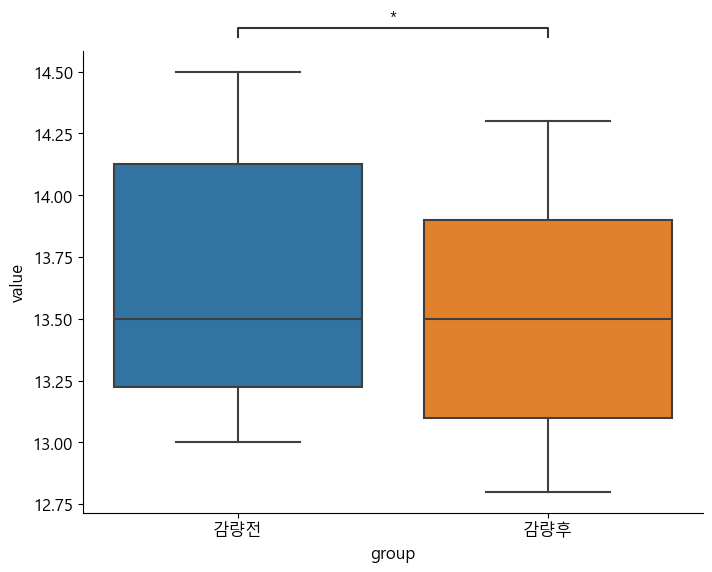

In [29]:
plt.figure()
ax = sb.boxplot(data=df4_2, x='group', y='value')

annotator = Annotator(ax, data=df4_2, x='group', y='value', pairs=[('감량전', '감량후')])
annotator.configure(test='t-test_paired', text_format='star', loc='outside')
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

## 연습문제 5

In [30]:
df5 = pd.read_excel("https://data.hossam.kr/mldata/wrestler_diet.xlsx")
df5.head()

,이름,감량전 악력,감량후 악력,감량전 윗몸일으키기,감량후 윗몸일으키기,감량전 턱걸이,감량후 턱걸이
0,B.S,43,41,35,41,25,29
1,P.J,42,41,40,44,25,29
2,G.G,52,50,36,41,22,23
3,A.L,53,52,38,42,10,15
4,I.H,44,40,36,42,15,19


- 단일 표본에 대하여 체중 감량 전과 체중 감량 후의 차이를 확인하고자 하는 것이므로 대응표본 T검정을 실행한다.

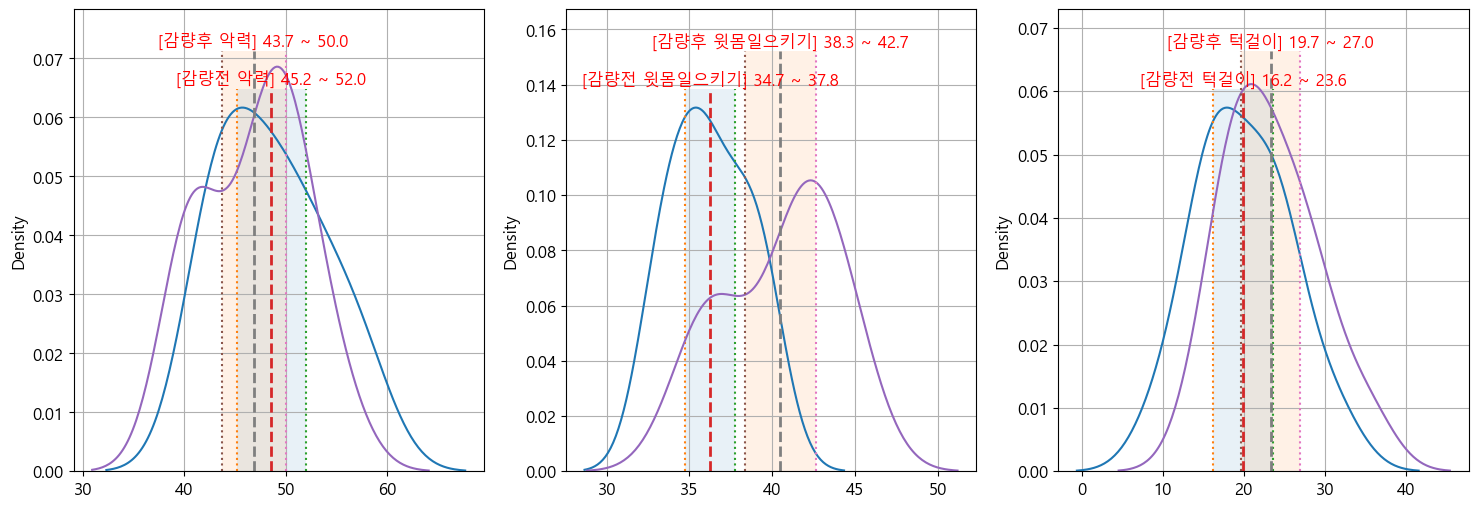

In [31]:
fig, ax = plt.subplots(1, 3, figsize = (18, 6))
cols = [['감량전 악력', '감량후 악력'],
        ['감량전 윗몸일으키기', '감량후 윗몸일으키기'],
        ['감량전 턱걸이', '감량후 턱걸이']]

for i, x in enumerate(ax):
    for c in cols[i]:
        #print(c)

        data = df5[c]                                # 데이터만 추출
        max = data.max()                                # 최대값
        clevel = 0.95                                   # 신뢰수준
        dof = len(data) - 1                             # 자유도
        sample_mean = data.mean()                       # 표본평균
        sample_std = data.std(ddof=1)                   # 표본표준편차
        sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

        # 신뢰구간
        cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

        sb.kdeplot(data=data, ax = x)

        xmin, xmax, ymin, ymax = x.axis()

        # 신뢰구간 그리기
        x.plot([cmin, cmin], [0, ymax], linestyle=':')
        x.plot([cmax, cmax], [0, ymax], linestyle=':')
        x.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

        # 평균 그리기
        x.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

        x.text(x=(cmax-cmin)/2+cmin,
                y=ymax,
                s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
                horizontalalignment="center",
                verticalalignment="bottom",
                fontdict={"size": 12, "color": "red"})
        x.set_ylim(0, ymax*1.1)
        x.set_xlabel("")
        x.grid(True)


plt.show()
plt.close()

- 일부 커널 밀도 함수 그래프의 모양으로는 정규성을 확인할기 애매하여 별도의 정규성 검정이 필요하며, 각 기준별로 그룹별 데이터 분포가 서로 다르다고 할 수 있다. 모든 그룹은 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.

In [32]:
for c in df5.columns[1:]:
    s, p = normaltest(df5[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))

[감량전 악력] statistic: 1.146, p-value: 0.564, 정규성 충족 여부: True
[감량후 악력] statistic: 1.358, p-value: 0.507, 정규성 충족 여부: True
[감량전 윗몸일으키기] statistic: 1.363, p-value: 0.506, 정규성 충족 여부: True
[감량후 윗몸일으키기] statistic: 2.008, p-value: 0.366, 정규성 충족 여부: True
[감량전 턱걸이] statistic: 0.154, p-value: 0.926, 정규성 충족 여부: True
[감량후 턱걸이] statistic: 1.021, p-value: 0.600, 정규성 충족 여부: True


- 모든 데이터는 정규성을 만족한다

In [33]:
normal_dist = True      # 정규성 만족 여부
cols = [['감량전 악력', '감량후 악력'],
        ['감량전 윗몸일으키기', '감량후 윗몸일으키기'],
        ['감량전 턱걸이', '감량후 턱걸이']]

for i in cols:
    data = df5[i].copy()    # 원본 데이터 복사
    fields = list(map(lambda x: data[x], data.columns))

    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*fields)
    else:
        n = "Levene"
        s, p = levene(*fields)

    print("{4} {0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p >= 0.05, i))

['감량전 악력', '감량후 악력'] Bartlett 검정: statistic: 0.043, p-value: 0.836, 등분산성 충족 여부: True
['감량전 윗몸일으키기', '감량후 윗몸일으키기'] Bartlett 검정: statistic: 1.310, p-value: 0.252, 등분산성 충족 여부: True
['감량전 턱걸이', '감량후 턱걸이'] Bartlett 검정: statistic: 0.002, p-value: 0.964, 등분산성 충족 여부: True


- 각 데이터 쌍별로 등분산성을 만족한다.

- 체중 감량 전과 감량 후의 차이가 있는지만 확인하므로 양측 검정을 실행한다.
  - 귀무가설 : 체중 감량 전과 체중 감량 후의 운동 기록은 다르지 않다.
  - 대립가설 : 체중 감량 전과 체중 감량 후의 운동 기록은 다르다.

In [34]:
cols = [['감량전 악력', '감량후 악력'],
        ['감량전 윗몸일으키기', '감량후 윗몸일으키기'],
        ['감량전 턱걸이', '감량후 턱걸이']]

for i in cols:
    s, p = ttest_rel(df5[i[0]], df5[i[1]])
    print("{3} statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무", i))

['감량전 악력', '감량후 악력'] statistic: 2.365, p-value: 0.037, 대립가설 채택
['감량전 윗몸일으키기', '감량후 윗몸일으키기'] statistic: -7.180, p-value: 0.000, 대립가설 채택
['감량전 턱걸이', '감량후 턱걸이'] statistic: -6.842, p-value: 0.000, 대립가설 채택


- 각 검정 결과 모든 기준에서 p-value가 0.05보다 작으므로 귀무가설을 기각하고 체중 감량 전과 체중 감량 후의 운동 기록은 다르다는 대립가설을 채택한다. 따라서 체중 감량이 운동 기록에 영향을 준다.

In [35]:
li_df = []
cols = [['감량전 악력', '감량후 악력'],
        ['감량전 윗몸일으키기', '감량후 윗몸일으키기'],
        ['감량전 턱걸이', '감량후 턱걸이']]

for i, v in enumerate(cols):
    tmp_df = df5[v]
    tmp_df2 = pd.melt(tmp_df, var_name = 'group', value_name = 'value')
    li_df.append(tmp_df2)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 악력 vs. 감량후 악력: t-test paired samples, P_val:3.745e-02 t=2.365e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 윗몸일으키기 vs. 감량후 윗몸일으키기: t-test paired samples, P_val:1.798e-05 t=-7.180e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 턱걸이 vs. 감량후 턱걸이: t-test paired samples, P_val:2.794e-05 t=-6.842e+00


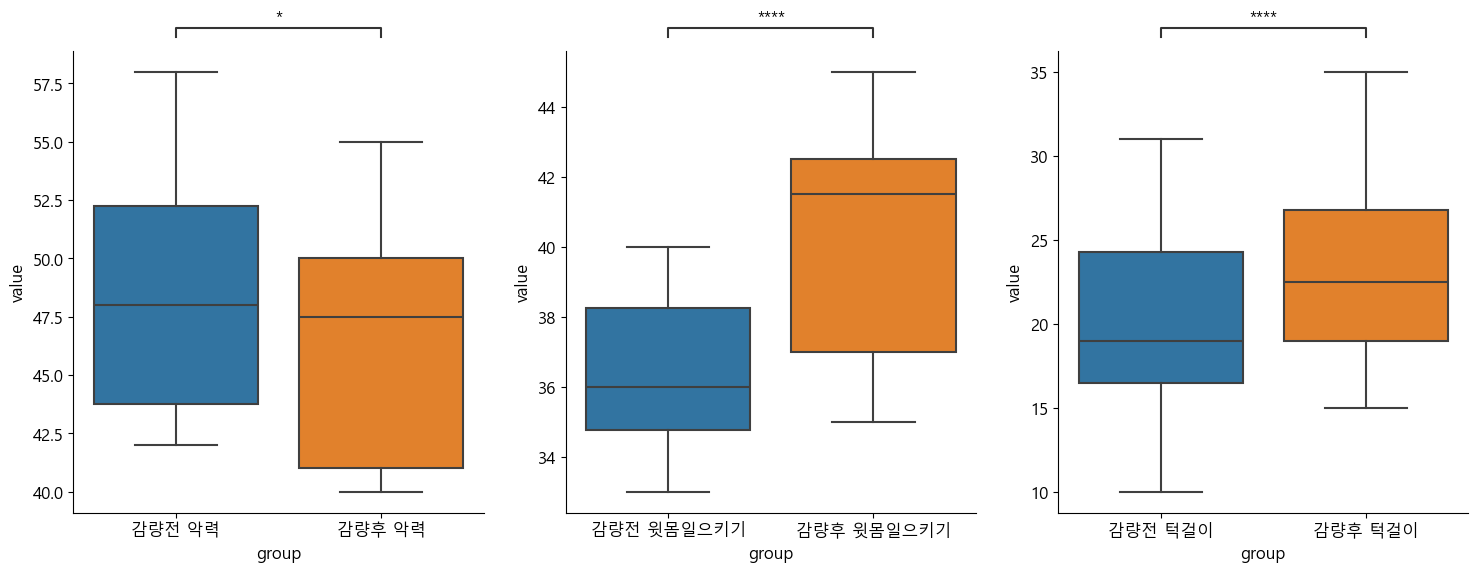

In [92]:
fig, ax = plt.subplots(1, 3, figsize = (18, 6))

for i, v in enumerate(li_df):
    sb.boxplot(data=v, x='group', y='value', ax = ax[i])

    annotator = Annotator(ax[i], data=v, x='group', y='value', pairs=[tuple(v['group'].unique())])
    annotator.configure(test='t-test_paired', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    
    sb.despine(ax = ax[i])

plt.show()
plt.close()

## 연습문제 6

In [38]:
df6 = pd.read_excel("https://data.hossam.kr/mldata/commercial.xlsx")
df6.head()

,quarter,code,type,name,sales_amount,number_of_sales
0,1,3001491,관광특구,이태원 관광특구,72523644100,2496865
1,1,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,283332346393,10246122
2,1,3001493,관광특구,동대문패션타운 관광특구,81696730221,2880324
3,1,3001494,관광특구,종로·청계 관광특구,212062656625,4960006
4,1,3001495,관광특구,잠실 관광특구,231338386876,5995166


### 데이터 확인

In [39]:
df6.shape

(6222, 6)

In [40]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   quarter          6222 non-null   int64 
 1   code             6222 non-null   int64 
 2   type             6222 non-null   object
 3   name             6222 non-null   object
 4   sales_amount     6222 non-null   int64 
 5   number_of_sales  6222 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 291.8+ KB


In [41]:
df6.describe(include = 'all')

,quarter,code,type,name,sales_amount,number_of_sales
count,6222.000000,6.222000e+03,6222,6222,6.222000e+03,6.222000e+03
unique,NaN,NaN,4,1564,NaN,NaN
top,NaN,NaN,골목상권,이태원 관광특구,NaN,NaN
freq,NaN,NaN,4093,4,NaN,NaN
mean,2.500321,3.115155e+06,NaN,NaN,1.430835e+10,5.015848e+05
std,1.118124,1.039465e+04,NaN,NaN,4.894260e+10,1.173159e+06
min,1.000000,3.001491e+06,NaN,NaN,6.662400e+04,3.000000e+00
25%,2.000000,3.110407e+06,NaN,NaN,9.673275e+08,3.727150e+04
50%,3.000000,3.110815e+06,NaN,NaN,3.224000e+09,1.635320e+05
75%,3.750000,3.120138e+06,NaN,NaN,9.851681e+09,4.521188e+05


In [42]:
df6['quarter'].value_counts()

3    1556
4    1556
1    1555
2    1555
Name: quarter, dtype: int64

- 분기는 (1, 2, 3, 4)만 있으므로 상반기와 하반기를 나누는 데 별도의 처리가 필요하지 않다.

In [43]:
df6['type'].value_counts()

골목상권    4093
전통시장    1109
발달상권     996
관광특구      24
Name: type, dtype: int64

- 상권은 관광특구를 제외하면 충분한 수의 데이터가 있다.

### 데이터 전처리

- code, name과 numbers_of_sales 컬럼은 분석의 대상이 아니므로 삭제한다

In [44]:
df6.drop(['code', 'name', 'number_of_sales'], axis = 1, inplace = True)
df6.head()

,quarter,type,sales_amount
0,1,관광특구,72523644100
1,1,관광특구,283332346393
2,1,관광특구,81696730221
3,1,관광특구,212062656625
4,1,관광특구,231338386876


- quarter을 이용하여 상반기와 하반기를 별도 컬럼으로 분류한다.

In [45]:
df6['half'] = df6['quarter'].apply(lambda x : '상반기' if x <=2 else '하반기')
df6['half'].value_counts()

하반기    3112
상반기    3110
Name: half, dtype: int64

In [46]:
df6.head()

,quarter,type,sales_amount,half
0,1,관광특구,72523644100,상반기
1,1,관광특구,283332346393,상반기
2,1,관광특구,81696730221,상반기
3,1,관광특구,212062656625,상반기
4,1,관광특구,231338386876,상반기


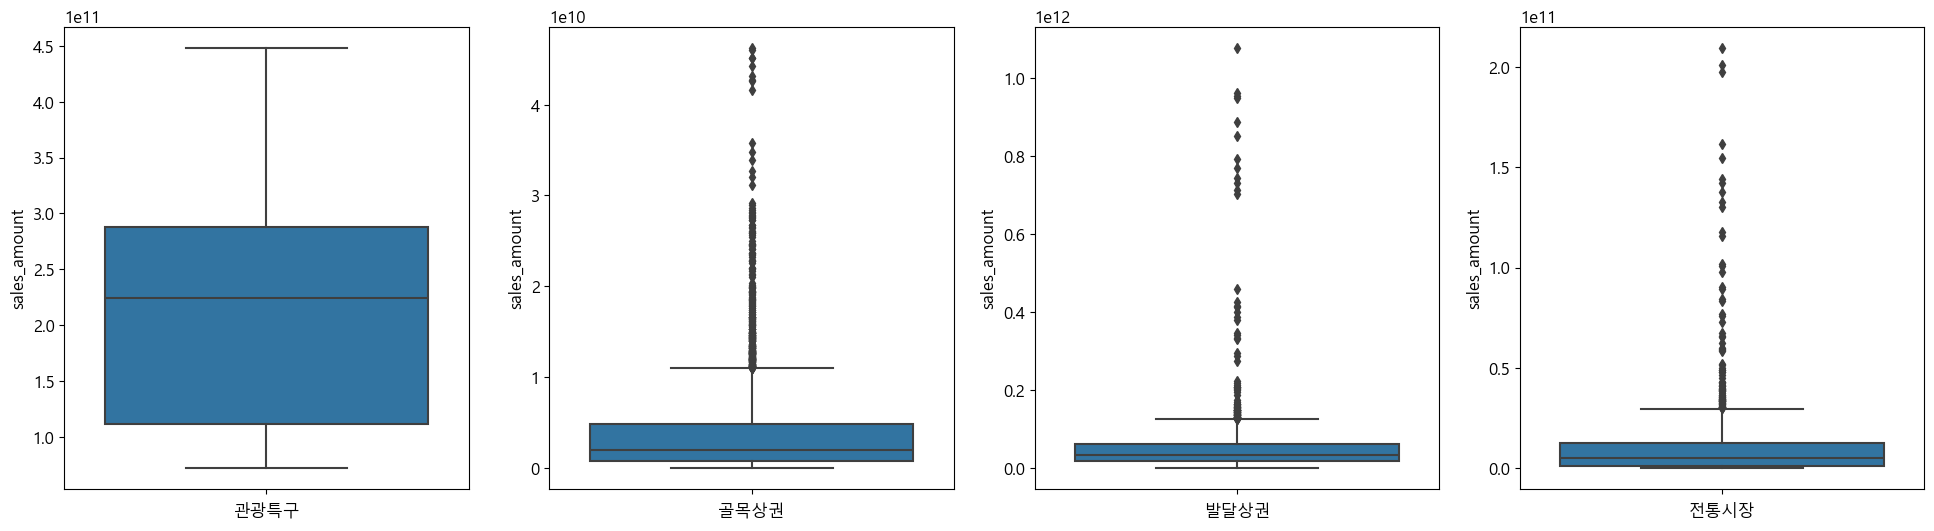

In [138]:
fig, ax = plt.subplots(1, 4, figsize = (24, 6))
for i, v in enumerate(df6['type'].unique()):
    tmp = df6[df6['type'] == v]
    sb.boxplot(data = tmp, y = 'sales_amount', ax = ax[i])
    ax[i].set_xlabel(v)
plt.show()

- 이상치는 평균을 분석하는데 부정적인 영향을 미칠 것으로 판단하여 제거후 분석한다.

In [139]:
df6_ref = pd.DataFrame()

for i, v in enumerate(df6['type'].unique()):
    tmp = df6[df6['type'] == v]
    Q3_6 = tmp['sales_amount'].quantile(.75)
    Q1_6 = tmp['sales_amount'].quantile(.25)
    IQR_6 = Q3_6 - Q1_6
    max_6 = Q3_6 + 1.5 * IQR_6
    min_6 = Q1_6 - 1.5 * IQR_6
    tmp.query('sales_amount < @max_6', inplace = True)
    tmp.query('sales_amount > @min_6', inplace = True)
    df6_ref = pd.concat([df6_ref, tmp], axis = 0)

In [142]:
df6_copy = df6.copy()

In [143]:
df6 = df6_ref.copy()

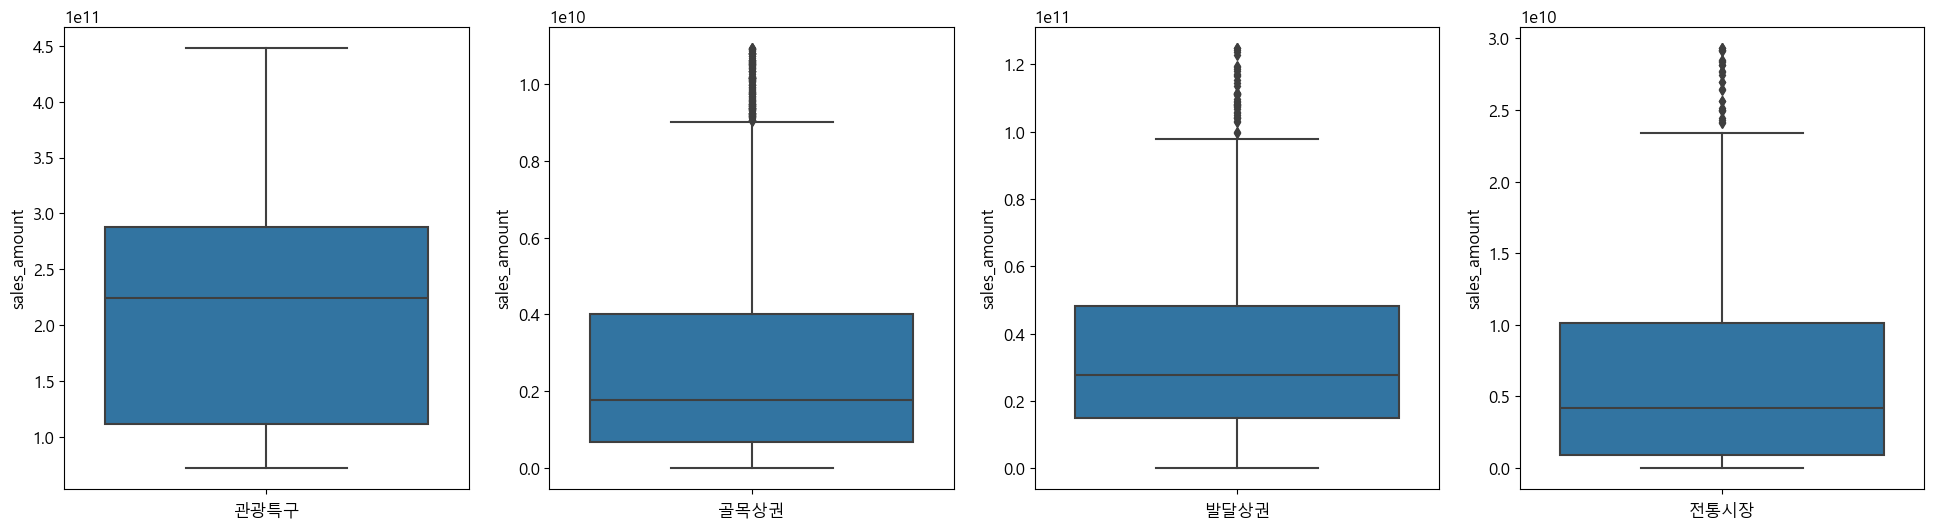

In [160]:
fig, ax = plt.subplots(1, 4, figsize = (24, 6))
for i, v in enumerate(df6['type'].unique()):
    tmp = df6[df6['type'] == v]
    sb.boxplot(data = tmp, y = 'sales_amount', ax = ax[i])
    ax[i].set_xlabel(v)
plt.show()

In [144]:
df6[['type', 'half']].value_counts()

type  half
골목상권  상반기     1923
      하반기     1900
전통시장  상반기      520
      하반기      505
발달상권  상반기      461
      하반기      447
관광특구  상반기       12
      하반기       12
dtype: int64

- 분류별 데이터 크기 확인 결과 상/하반기 데이터의 크기가 다른 경우도 있으며 같다 하더라도 해당 매출 데이터의 출처가 되는 매장이 같지 않을 가능성이 있기 때문에 검정은 독립표본 T검정을 실시한다

- 정규성 검정

In [145]:
type_li = df6['type'].unique()
half_li = ['상반기', '하반기']

In [146]:
for i in type_li:
    for j in half_li:
        tmp_df = df6[df6['type'] == i]
        data = tmp_df[tmp_df['half'] == j]['sales_amount']
        s, p = normaltest(data)
        print("[{0}, {4}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(i, s, p, p >= 0.05, j))

[관광특구, 상반기] statistic: 0.196, p-value: 0.907, 정규성 충족 여부: True
[관광특구, 하반기] statistic: 2.817, p-value: 0.244, 정규성 충족 여부: True
[골목상권, 상반기] statistic: 341.626, p-value: 0.000, 정규성 충족 여부: False
[골목상권, 하반기] statistic: 297.452, p-value: 0.000, 정규성 충족 여부: False
[발달상권, 상반기] statistic: 90.264, p-value: 0.000, 정규성 충족 여부: False
[발달상권, 하반기] statistic: 67.767, p-value: 0.000, 정규성 충족 여부: False
[전통시장, 상반기] statistic: 114.735, p-value: 0.000, 정규성 충족 여부: False
[전통시장, 하반기] statistic: 81.130, p-value: 0.000, 정규성 충족 여부: False


- 관광특구를 제외하고 정규성을 만족하지 않는다. 로그 변환을 적용한 후 재검정을 실시한다

In [147]:
df6_2 = df6.copy()
df6_2['sales_amount'] = np.log(df6_2['sales_amount'])

In [148]:
for i in type_li:
    for j in half_li:
        tmp_df = df6_2[df6_2['type'] == i]
        data = tmp_df[tmp_df['half'] == j]['sales_amount']
        s, p = normaltest(data)
        print("[{0}, {4}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(i, s, p, p >= 0.05, j))

[관광특구, 상반기] statistic: 1.781, p-value: 0.411, 정규성 충족 여부: True
[관광특구, 하반기] statistic: 2.880, p-value: 0.237, 정규성 충족 여부: True
[골목상권, 상반기] statistic: 482.297, p-value: 0.000, 정규성 충족 여부: False
[골목상권, 하반기] statistic: 551.808, p-value: 0.000, 정규성 충족 여부: False
[발달상권, 상반기] statistic: 106.222, p-value: 0.000, 정규성 충족 여부: False
[발달상권, 하반기] statistic: 120.520, p-value: 0.000, 정규성 충족 여부: False
[전통시장, 상반기] statistic: 73.141, p-value: 0.000, 정규성 충족 여부: False
[전통시장, 하반기] statistic: 61.395, p-value: 0.000, 정규성 충족 여부: False


- 로그변환을 실시하여도 정규성을 만족하지 않으므로 StandardScaler를 사용한다.

In [149]:
from sklearn.preprocessing import StandardScaler

df6_3 = df6.copy()
ss = StandardScaler()
df6_3['sales_amount'] = ss.fit_transform(df6_3[['sales_amount']])

In [150]:
for i in type_li:
    for j in half_li:
        tmp_df = df6_3[df6_3['type'] == i]
        data = tmp_df[tmp_df['half'] == j]['sales_amount']
        s, p = normaltest(data)
        print("[{0}, {4}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(i, s, p, p >= 0.05, j))

[관광특구, 상반기] statistic: 0.196, p-value: 0.907, 정규성 충족 여부: True
[관광특구, 하반기] statistic: 2.817, p-value: 0.244, 정규성 충족 여부: True
[골목상권, 상반기] statistic: 341.626, p-value: 0.000, 정규성 충족 여부: False
[골목상권, 하반기] statistic: 297.452, p-value: 0.000, 정규성 충족 여부: False
[발달상권, 상반기] statistic: 90.264, p-value: 0.000, 정규성 충족 여부: False
[발달상권, 하반기] statistic: 67.767, p-value: 0.000, 정규성 충족 여부: False
[전통시장, 상반기] statistic: 114.735, p-value: 0.000, 정규성 충족 여부: False
[전통시장, 하반기] statistic: 81.130, p-value: 0.000, 정규성 충족 여부: False


- StandardScaler까지 사용했음에도 불구하고 관광특구를 제외하면 정규성을 만족하지 않는다.

In [151]:
normal_dist = [True, False, False, False]      # 정규성 만족 여부

for k, j in enumerate(type_li):
    fields = []
    for i in half_li:
        tmp_df = df6[df6['type'] == j]
        data = tmp_df[tmp_df['half'] == i]['sales_amount']
        fields.append(data)

    if normal_dist[k]:
        n = "Bartlett"
        s, p = bartlett(*fields)
    else:
        n = "Levene"
        s, p = levene(*fields)
    print("[{4}] {0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05, j))

[관광특구] Bartlett 검정: statistic: 1.061, p-value: 0.303, 등분산성 충족 여부: True
[골목상권] Levene 검정: statistic: 2.130, p-value: 0.144, 등분산성 충족 여부: True
[발달상권] Levene 검정: statistic: 0.011, p-value: 0.916, 등분산성 충족 여부: True
[전통시장] Levene 검정: statistic: 0.003, p-value: 0.953, 등분산성 충족 여부: True


- 등분산성은 모두 만족한다. 관광특구는 독립표본 검정을 실시하고 나머지는 Mann-Whitney U 검정을 실시한다

- 관광특구에 대한 검정 (양측검정)
  - 귀무가설 : 상반기와 하반기의 매출액은 다르지 않다.
  - 대립가설 : 상반기와 하반기의 매출액은 다르다.

In [152]:
df6_a = df6[df6['type'] == '관광특구']

In [153]:
s, p = ttest_ind(df6_a[df6_a['half'] == '하반기']['sales_amount'], df6_a[df6_a['half'] == '상반기']['sales_amount'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무"))

statistic: 1.112, p-value: 0.278, 귀무가설 채택


- 귀무가설이 채택되어 상반기와 하반기의 매출액은 다르지 않다는 결론이 도출된다.

- 관광특구에 대한 검정 (단측검정)
  - 귀무가설 : 상반기보다 하반기의 매출액이 크지(or 작지) 않다.
  - 대립가설 : 상반기보다 하반기의 매출액이 크다(or 작다).

In [154]:
s, p = ttest_ind(df6_a[df6_a['half'] == '하반기']['sales_amount'], df6_a[df6_a['half'] == '상반기']['sales_amount'], alternative = 'less')
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무"))

statistic: 1.112, p-value: 0.861, 귀무가설 채택


In [155]:
s, p = ttest_ind(df6_a[df6_a['half'] == '하반기']['sales_amount'], df6_a[df6_a['half'] == '상반기']['sales_amount'], alternative = 'greater')
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무"))

statistic: 1.112, p-value: 0.139, 귀무가설 채택


- 단측검정에서는 하반기가 상반기보다 매출액이 크거나 작지 않다는 귀무가설이 채택되었다.

- 골목상권, 발달상권, 전통시장에 대한 검정 (양측검정)
  - 귀무가설 : 상반기와 하반기의 매출액은 다르지 않다.
  - 대립가설 : 상반기와 하반기의 매출액은 다르다.

In [156]:
df6_b = df6[df6['type'] != '관광특구']

In [157]:
for i, v in enumerate(df6_b['type'].unique()):
    tmp_df = df6_b[df6_b['type'] == v]
    half_1st = tmp_df.query('half == "상반기"')['sales_amount']
    half_2nd = tmp_df.query('half == "하반기"')['sales_amount']
    s, p = mannwhitneyu(half_2nd, half_1st)
    print("[{3}] statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무", v))

[골목상권] statistic: 1903980.500, p-value: 0.024, 대립가설 채택
[발달상권] statistic: 107743.000, p-value: 0.233, 귀무가설 채택
[전통시장] statistic: 134024.500, p-value: 0.565, 귀무가설 채택


- 골목상권은 상반기와 하반기의 매출액은 다르지 않다는 귀무가설이 기각되어 상반기와 하반기 매출액이 다르다는 결론이 나왔으며, 나머지 구분에 대해서는 상반기와 하반기의 매출액이 다르지 않다는 귀무가설이 채택되었다.

- 관광특구에 대한 검정 (단측검정)
  - 귀무가설 : 상반기보다 하반기의 매출액이 크지(or 작지) 않다.
  - 대립가설 : 상반기보다 하반기의 매출액이 크다(or 작다).

In [158]:
for i, v in enumerate(df6_b['type'].unique()):
    tmp_df = df6_b[df6_b['type'] == v]
    half_1st = tmp_df.query('half == "상반기"')['sales_amount']
    half_2nd = tmp_df.query('half == "하반기"')['sales_amount']
    s, p = mannwhitneyu(half_2nd, half_1st, alternative = 'less')
    print("[{3}] statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무", v))

[골목상권] statistic: 1903980.500, p-value: 0.988, 귀무가설 채택
[발달상권] statistic: 107743.000, p-value: 0.883, 귀무가설 채택
[전통시장] statistic: 134024.500, p-value: 0.717, 귀무가설 채택


In [159]:
for i, v in enumerate(df6_b['type'].unique()):
    tmp_df = df6_b[df6_b['type'] == v]
    half_1st = tmp_df.query('half == "상반기"')['sales_amount']
    half_2nd = tmp_df.query('half == "하반기"')['sales_amount']
    s, p = mannwhitneyu(half_2nd, half_1st, alternative = 'greater')
    print("[{3}] statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무", v))

[골목상권] statistic: 1903980.500, p-value: 0.012, 대립가설 채택
[발달상권] statistic: 107743.000, p-value: 0.117, 귀무가설 채택
[전통시장] statistic: 134024.500, p-value: 0.283, 귀무가설 채택


- 골목상권의 경우 하반기 매출액이 상반기 매출액보다 크다는 가설을 대립가설로 하는 검정에서 대립가설이 채택되었다. 나머지 구분에서는 모두 귀무가설이 채택되어 크거나 작지 않다는 결론이 도출된다.

### 연습문제 7

In [63]:
df7 = pd.read_excel("https://data.hossam.kr/mldata/cookie_cats.xlsx")
df7.head()

,userid,version,sum_gamerounds
0,116,A,3
1,337,A,38
2,377,B,165
3,483,B,1
4,488,B,179


### 데이터 전처리

- 데이터 확인

In [64]:
df7['version'].value_counts()

B    45489
A    44700
Name: version, dtype: int64

In [65]:
df7.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


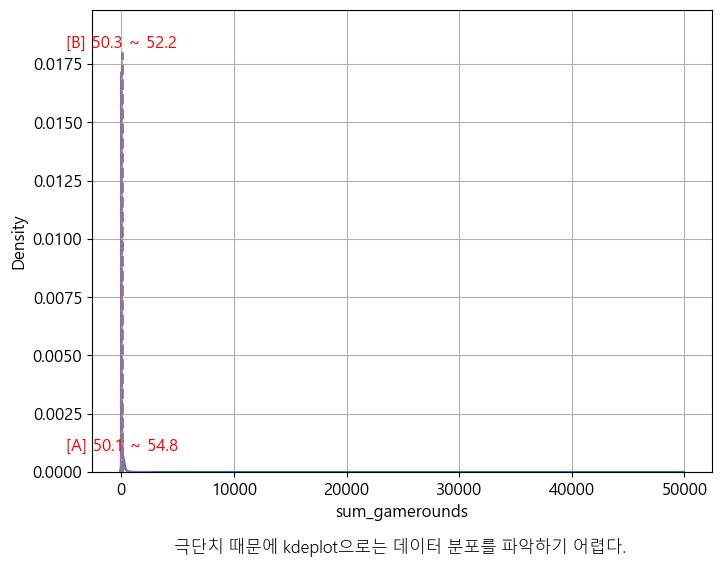

In [67]:
plt.figure()

for c in df7['version'].unique():
    #print(c)
    
    data = df7[df7['version'] == c]['sum_gamerounds']                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

plt.ylim(0, ymax*1.1)

txt = """극단치 때문에 kdeplot으로는 데이터 분포를 파악하기 어렵다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()
plt.close()

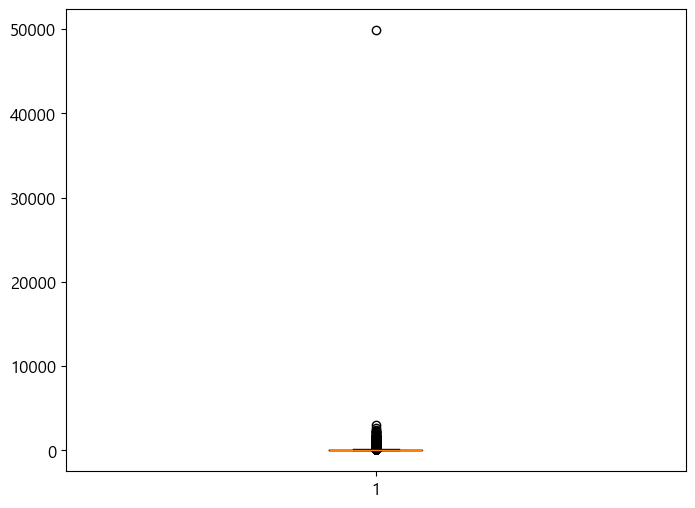

In [68]:
plt.figure()
plt.boxplot(df7['sum_gamerounds'])
plt.show()

In [69]:
df7['sum_gamerounds'].sort_values(ascending=False)

57702    49854
7912      2961
29417     2640
43671     2438
48188     2294
         ...  
59687        0
23707        0
59670        0
59645        0
45094        0
Name: sum_gamerounds, Length: 90189, dtype: int64

- 이상치가 다수 관측되었다. 수천 ~ 수만에 달하는 플레이 시간이 기록되었는데 중앙값 16, 평균값 51과 비교하여 정상적인 플레이 기록이라고 보기 어려울 정도로 많기 때문에 3/1사분위수 +- 1.5IQR 기준으로 하여 이상치는 모두 제거한다.
  - 추가로 플레이 기록이 없다고 볼수 있는 0은 제거한다

In [70]:
Q1 = df7['sum_gamerounds'].quantile(.25)
Q3 = df7['sum_gamerounds'].quantile(.75)
IQR = Q3 - Q1

In [71]:
max_7 = Q3 + 1.5 * IQR
min_7 = Q1 - 1.5 * IQR

In [117]:
df7_2 = df7.query('sum_gamerounds < @max_7')
df7_2 = df7_2.query('sum_gamerounds > @min_7').copy()
df7_2 = df7_2.query('sum_gamerounds > 0')

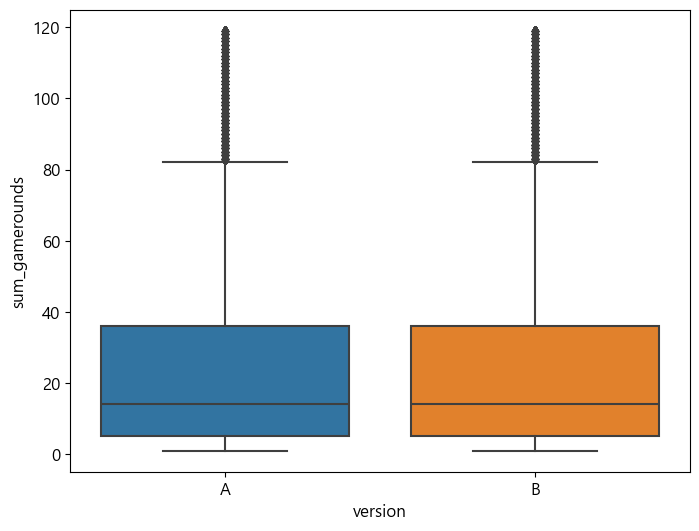

In [118]:
plt.figure()
sb.boxplot(data = df7_2, y = 'sum_gamerounds', x = 'version')
plt.show()

In [119]:
df7_2.describe()

,userid,sum_gamerounds
count,7.591900e+04,75919.000000
mean,4.993554e+06,25.115478
std,2.882398e+06,27.429499
min,1.160000e+02,1.000000
25%,2.511354e+06,5.000000
50%,4.994525e+06,14.000000
75%,7.487273e+06,36.000000
max,9.999861e+06,119.000000


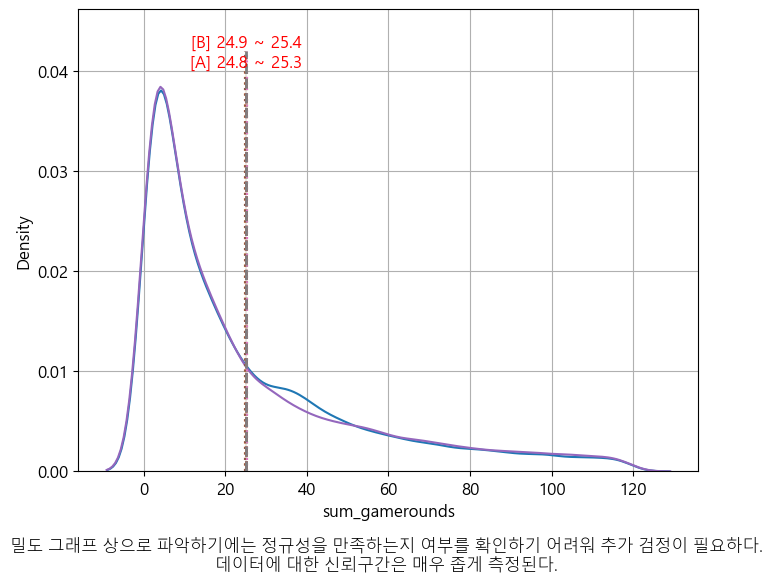

In [120]:
plt.figure()

for c in df7_2['version'].unique():
    #print(c)
    
    data = df7_2[df7_2['version'] == c]['sum_gamerounds']                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

plt.ylim(0, ymax*1.1)

txt = """밀도 그래프 상으로 파악하기에는 정규성을 만족하는지 여부를 확인하기 어려워 추가 검정이 필요하다. 데이터에 대한 신뢰구간은 매우 좁게 측정된다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()
plt.close()

In [121]:
for c in df7_2['version'].unique():
    data = df7_2[df7_2['version'] == c]['sum_gamerounds']
    s, p = normaltest(data)
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))

[A] statistic: 9156.402, p-value: 0.000, 정규성 충족 여부: False
[B] statistic: 9163.585, p-value: 0.000, 정규성 충족 여부: False


In [122]:
for c in df7_2['version'].unique():
    data = np.log(df7_2[df7_2['version'] == c]['sum_gamerounds'])
    s, p = normaltest(data)
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))

[A] statistic: 3717.081, p-value: 0.000, 정규성 충족 여부: False
[B] statistic: 4257.661, p-value: 0.000, 정규성 충족 여부: False


In [123]:
for c in df7_2['version'].unique():
    ss = StandardScaler()
    data = (ss.fit_transform(df7_2[df7_2['version'] == c][['sum_gamerounds']]))[:, 0]
    s, p = normaltest(data)
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))

[A] statistic: 9156.402, p-value: 0.000, 정규성 충족 여부: False
[B] statistic: 9163.585, p-value: 0.000, 정규성 충족 여부: False


- 스케일링을 진행하였으나 데이터는 정규성을 만족하지 않는다

In [124]:
normal_dist = False    # 정규성 만족 여부
version_li = ['A', 'B']


fields = []
for i in version_li:
    tmp_df = df7_2[df7_2['version'] == i]
    data = tmp_df['sum_gamerounds']
    fields.append(data)

if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*fields)
else:
        n = "Levene"
        s, p = levene(*fields)
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Levene 검정: statistic: 2.792, p-value: 0.095, 등분산성 충족 여부: True


- 데이터가 등분산성은 만족한다. Mann-Whitney U 검정을 실시한다.
  - 양측검정
    - 귀무가설 : 개편 이후와 개편 이전의 플레이 시간 평균은 다르지 않다.
    - 대립가설 : 개편 이우화 개편 이전의 플레이 시간 평균은 다르다.

In [163]:
version_a = df7_2[df7_2['version'] == 'A']['sum_gamerounds']
version_b = df7_2[df7_2['version'] == 'B']['sum_gamerounds']

s, p = mannwhitneyu(version_b, version_a)
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무"))

statistic: 715181281.500, p-value: 0.083, 귀무가설 채택


- p-value가 0.034로 대립가설이 채택되어 개편 전 후 평균 플레이 시간은 차이가 있다고 볼 수 있다.

- 단측검정
  - 귀무가설 : 개편 이후가 개편 이전보다 평균 플레이시간이 길지(or 짧지) 않다.
  - 대립가설 : 개편 이후가 개편 이전보다 평균 플레이시간이 길다(or 짧다).

In [126]:
s, p = mannwhitneyu(version_b, version_a, alternative = 'less')
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무"))

statistic: 715181281.500, p-value: 0.041, 대립가설 채택


In [127]:
s, p = mannwhitneyu(version_b, version_a, alternative = 'greater')
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무"))

statistic: 715181281.500, p-value: 0.959, 귀무가설 채택


- 단측 검정 결과 B가 A보다 플레이 시간이 길지 않다는 단측 검정에 대하여 귀무가설이 채택되고, 짧지 않다는 단측검정에 대하여 대립가설이 채택되었다. 개편 이후인 B보다 개편 이전인 A의 평균 플레이시간이 더 길다는 결론이 도출되었다.

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B: Mann-Whitney-Wilcoxon test two-sided, P_val:8.279e-02 U_stat=7.257e+08
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B: Mann-Whitney-Wilcoxon test smaller, P_val:9.586e-01 U_stat=7.257e+08
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B: Mann-Whitney-Wilcoxon test greater, P_val:4.140e-02 U_stat=7.257e+08


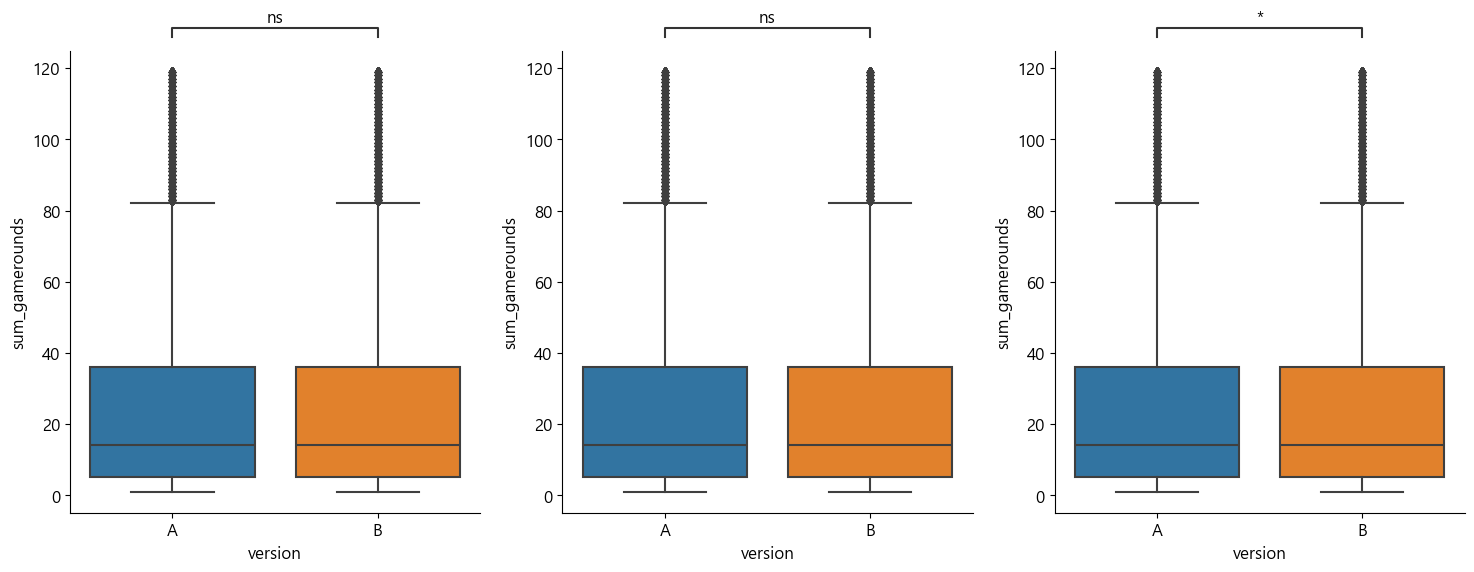

In [128]:
test = ['Mann-Whitney', 'Mann-Whitney-ls', 'Mann-Whitney-gt']

config = {
    "data": df7_2,
    "x": "version",
    "y": "sum_gamerounds",
    "pairs": [("A", "B")],
    "test": None,
    "text_format": "star",
    "loc": "outside"
}

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, v in enumerate(ax):
    config['test'] = test[i]

    k = sb.boxplot(ax=v, data=config['data'], x=config['x'], y=config['y'])

    annotator = Annotator(k, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
    annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
    annotator.apply_and_annotate()

    sb.despine(ax=v)

plt.show()
plt.close()